In [1]:
import numpy as np
import pandas
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import os

In [2]:
moods = ['happy', 'focus', 'relax', 'fitness', 'party', 'romantic', 'sad']
path = './dataset.csv'

client_id = '2d0aef4304064e67bdce269495c514ba'
client_secret = 'b0b2829b32cd4963a5de4c35528faf1d'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

def create_initial_dataset(moods: list) -> pandas.DataFrame:
    
    search_results = []
    songs = []

    #collect 10 playlist IDs for each mood
    for m in moods:

        search_query = m
        result = sp.search(search_query, type='playlist')
        search_results.append(result)

    print('Playlists scraped successfully...')

    #collect audio features from every son m the collected playlists are composed of
    for i in range(len(search_results)):
        print(moods[i], ':')
        for j in search_results[i]['playlists']['items']:
            tracks = sp.playlist_items(j['id'])
            for k in tracks['items']:
                if (k['track'] != None and k['track']['id'] != None and k['track']['id'] != ''):
                    #details
                    uri = 'spotify:track:' + k['track']['id']
                    features = sp.audio_features(uri)
                    if (features[0] != None):
                        songs.append([moods[i], k['track']['id'], features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
        print("Got 'em tracks!")
    
    #create dataframe and store information on a .csv document for quicker retrieval
    array = np.array(songs)
    df = pandas.DataFrame(array, columns=['mood', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df.to_csv('./dataset.csv')
    print('Done!')
    return df

if not os.path.exists(path):
    df = create_initial_dataset(moods)

else:
    df = pandas.read_csv(path)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000
mean,0.587326,0.526128,5.237723,-10.496771,0.640796,0.071224,0.413696,0.229057,0.440335,117.160455
std,0.186962,0.286799,3.578986,7.785063,0.479784,0.072419,0.369567,0.376554,0.264052,29.181167
min,0.000000,0.000020,0.000000,-46.084000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478500,0.300000,2.000000,-12.394000,0.000000,0.035800,0.059300,0.000000,0.212000,96.011000
50%,0.624000,0.584000,5.000000,-7.448000,1.000000,0.045100,0.293000,0.000065,0.419000,119.997000
75%,0.726000,0.766000,8.000000,-5.333500,1.000000,0.069150,0.803000,0.476500,0.652000,132.075000
max,0.979000,0.999000,11.000000,1.342000,1.000000,0.947000,0.996000,1.000000,0.984000,220.099000


In [3]:
df.drop_duplicates(subset='song', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000
mean,0.579518,0.512194,5.243211,-10.881070,0.642203,0.070706,0.429839,0.249828,0.435119,116.825789
std,0.189973,0.289447,3.569900,7.933448,0.479372,0.073031,0.371998,0.387414,0.266426,30.034697
min,0.000000,0.000020,0.000000,-46.084000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.465000,0.268000,2.000000,-13.216500,0.000000,0.035500,0.065400,0.000000,0.203000,94.933500
50%,0.614000,0.565000,5.000000,-7.733000,1.000000,0.044900,0.325000,0.000111,0.409000,119.945000
75%,0.721000,0.755000,8.000000,-5.470000,1.000000,0.068000,0.830500,0.703000,0.649500,133.905000
max,0.979000,0.999000,11.000000,1.342000,1.000000,0.947000,0.996000,1.000000,0.984000,220.099000


In [4]:
df.iloc[:, 2:].astype('float')
df.head(len(df))

,mood,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,happy,0W1jh3ExLv0nMvvmNJOBxh,0.806,0.7530,11,-6.247,0,0.0534,0.031000,0.500000,0.8460,122.990
1,happy,2tYbp6gUNzQXYj8XhVAh9e,0.547,0.8810,0,-3.152,0,0.0512,0.015900,0.000000,0.2150,99.979
2,happy,2jPgrYdSzHarxh2v6O6aUc,0.809,0.4860,9,-11.028,0,0.0712,0.143000,0.861000,0.3090,123.024
3,happy,5hct3OPZEhHKqvGyRqq2TA,0.796,0.7690,1,-1.632,1,0.0356,0.000305,0.776000,0.4080,123.987
4,happy,1OfHes9WQdGQSIgNwrqIAw,0.642,0.9070,2,-3.260,0,0.0507,0.007680,0.000064,0.3570,107.060
...,...,...,...,...,...,...,...,...,...,...,...,...
11890,sad,0cHAXbQfTlBIJrzIOW8kUv,0.527,0.0861,5,-15.326,1,0.0301,0.920000,0.000334,0.2250,103.582
11891,sad,5pLpkaIRobcvPnUmclNv6o,0.597,0.3630,5,-10.365,0,0.0314,0.626000,0.000030,0.0785,130.022
11892,sad,5VjTlCuX8C11QDunDwvyNh,0.617,0.3150,3,-7.998,1,0.0326,0.771000,0.000000,0.4470,119.822
11893,sad,5RzH8ZRHQgkgdZgyQqwIRg,0.393,0.0180,2,-20.968,1,0.0421,0.964000,0.000400,0.1150,105.115


In [5]:
def count_songs_for_mood(df: pandas.DataFrame) -> list:
    
    counter = [0 for i in moods]

    for j in range(len(df)):
        m = df.iloc[j]['mood']
        for k in range(len(moods)):
            if moods[k] == m:
                counter[k] += 1
    return counter

counter = count_songs_for_mood(df)

In [6]:
counter

[1714, 1996, 1887, 1342, 1630, 1835, 1491]

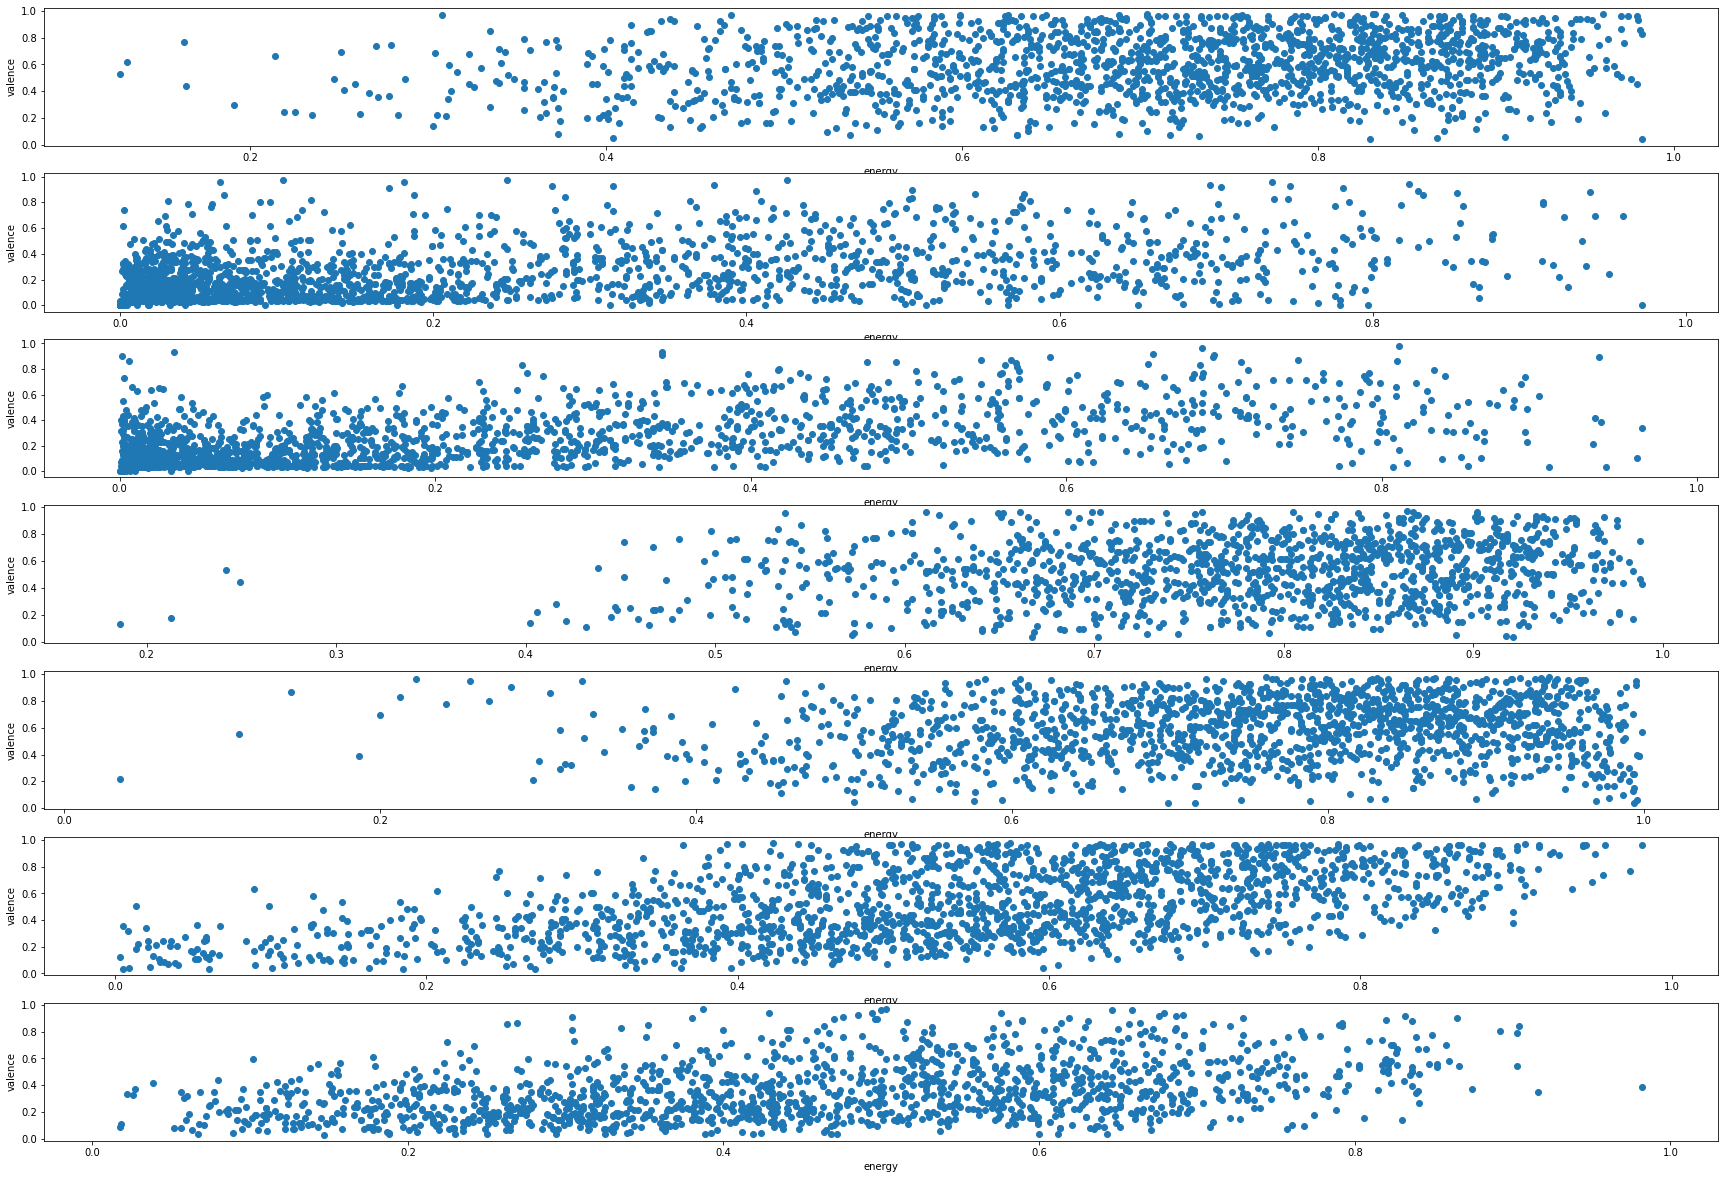

In [8]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(30,30))

def draw_scatters(counter: list, df: pandas.DataFrame):
    
    curpos = 0
    cc = 1

    for c in counter:
        df_single_mood = df[curpos:curpos + c]
        df_single_mood = df_single_mood[['energy', 'valence']].astype('float')
        
        curpos += c
        
        plt.subplot(10, 1, cc)
        plt.scatter([float(x) for x in df_single_mood['energy']], [float (x) for x in df_single_mood['valence']])
        plt.xlabel('energy')
        plt.ylabel('valence')
        
        cc += 1
        
draw_scatters(counter, df_en_val)

In [9]:
#normalize and standardize possible outliers
df.loc[:, 'key'] = (df.key - df.key.min()) / (df.key.max() - df.key.min())
df.loc[:, 'loudness'] = (df.loudness - df.loudness.min()) / (df.loudness.max() - df.loudness.min())
df.loc[:, 'tempo'] = (df.tempo - df.tempo.min()) / (df.tempo.max() - df.tempo.min())

#outliers detection based on zscore on all features
from scipy import stats
import math

#to check how many will be cut off
counter = count_songs_for_mood(df)
print(counter)

df_no_id = df.loc[:, ['mood', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
df_no_id.iloc[:, 1:11] = df_no_id.iloc[:, 1:11].astype('float')

#empty DataFrame, to be built with next for cycle
df_to_build = pandas.DataFrame()

#remove outliers based on z-score on every feature
curpos = 0
for c in counter:

    df_no_id_single_mood = df_no_id.iloc[curpos:curpos+c, 1:11]
    z = np.abs(stats.zscore(df_no_id_single_mood))

    threshold = 3

    df_no_id_single_mood = df_no_id_single_mood[(z < threshold).all(axis=1)]
    df_no_id_single_mood = df_no_id_single_mood.merge(df_no_id.iloc[curpos:curpos+c], on=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df_no_id_single_mood.drop_duplicates(inplace=True)
    df_to_build = pandas.concat([df_to_build, df_no_id_single_mood])

    curpos += c
    
counter = count_songs_for_mood(df_to_build)
print(counter)

[1714, 1996, 1887, 1342, 1630, 1835, 1491]
[1527, 1882, 1812, 1184, 1440, 1686, 1382]


In [10]:
from sklearn.model_selection import train_test_split

y, X = df_to_build['mood'], df_to_build.iloc[:, :10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [12]:
def fit_classifiers(X_train: pandas.DataFrame, y_train: pandas.DataFrame, X_test: pandas.DataFrame, y_test: pandas.DataFrame):
    
    classifier_names = ['DecisionTreeClassifier', 'SVC', 'MultinomialNB', 'RandomForestClassifier', 'KNeighborsClassifier',
                        'GaussianProcessClassifier', 'QuadraticDiscriminantAnalysis', 'AdaBoostClassifier', 'MLPClassifier']
    
    classifiers = [DecisionTreeClassifier(), SVC(gamma='auto', probability=True), MultinomialNB(), RandomForestClassifier(),
                   KNeighborsClassifier(), GaussianProcessClassifier(), QuadraticDiscriminantAnalysis(), AdaBoostClassifier(),
                   MLPClassifier(max_iter=1000)]
    
    test_scores = []
    
    for clf in range(len(classifiers)):
        
        classifiers[clf].fit(X_train, y_train)
        print(classifier_names[clf]+':')
        print("TRAIN SET", classifiers[clf].score(X_train, y_train))
        test_score = classifiers[clf].score(X_test, y_test)
        print("TEST SET", test_score)
        test_scores.append(test_score)
        print('\n\n')
        
    max = 0
    id = 0
    for i in range(len(test_scores)):
        if test_scores[i] > max:
            id = i
            max = test_scores[i]
        
    return classifiers

In [14]:
best_clf = fit_classifiers(X_train, y_train, X_test, y_test)

DecisionTreeClassifier:
TRAIN SET 0.9948023526193407
TEST SET 0.39866740699611325



SVC:
TRAIN SET 0.4500068390097114
TEST SET 0.44031093836757357



MultinomialNB:
TRAIN SET 0.4065107372452469
TEST SET 0.40033314825097166



RandomForestClassifier:
TRAIN SET 0.9948023526193407
TEST SET 0.5077734591893392



KNeighborsClassifier:
TRAIN SET 0.6088086445082752
TEST SET 0.42309827873403666



GaussianProcessClassifier:
TRAIN SET 0.485706469703187
TEST SET 0.4708495280399778



QuadraticDiscriminantAnalysis:
TRAIN SET 0.464779099986322
TEST SET 0.4597445863409217



AdaBoostClassifier:
TRAIN SET 0.4356449186157844
TEST SET 0.42171016102165465



MLPClassifier:
TRAIN SET 0.5125153877718507
TEST SET 0.4961132704053304





In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif, k=5)
select.fit(X_train, y_train)
mask = select.get_support()
print(mask)
df.describe()

[False  True False  True False False  True  True  True False]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000
mean,0.579518,0.512194,0.476656,0.742271,0.642203,0.070706,0.429839,0.249828,0.435119,0.530787
std,0.189973,0.289447,0.324536,0.167281,0.479372,0.073031,0.371998,0.387414,0.266426,0.136460
min,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.465000,0.268000,0.181818,0.693027,0.000000,0.035500,0.065400,0.000000,0.203000,0.431322
50%,0.614000,0.565000,0.454545,0.808649,1.000000,0.044900,0.325000,0.000111,0.409000,0.544959
75%,0.721000,0.755000,0.727273,0.856366,1.000000,0.068000,0.830500,0.703000,0.649500,0.608385
max,0.979000,0.999000,1.000000,1.000000,1.000000,0.947000,0.996000,1.000000,0.984000,1.000000


In [22]:
#TODO:
#-più grafici

#Testing a mano
title = input('Song title: ')
artist = input('Song artist: ')
uri = ''

search_query = title + ' ' + artist
result = sp.search(search_query)

for i in result['tracks']['items']:
    # Find a song that matches title and artist
    if (i['artists'][0]['name'] == artist) and (i['name'] == title):
        uri = i['uri']
        break
else:
    try:
        # Just take the first song returned by the search (might be named differently)
        uri = result['tracks']['items'][0]['uri']
    except:
        # No results for artist and title
        print ("Cannot Find URI")

features = sp.audio_features(uri)
song = []

if (features[0] != None):
    song.append([features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
    array = np.array(song)
    df_app = pandas.DataFrame(array, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    print ("Best_clf:")
    for j in best_clf:
        prediction = j.predict(df_app)
        print(prediction)

Best_clf:
['fitness']
['focus']
['sad']
['romantic']
['focus']
['sad']
['focus']
['party']
['focus']
